In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

tsla = yf.download('TSLA', start='2015-01-01', end='2024-10-31')
bnd = yf.download('BND', start='2015-01-01', end='2024-10-31')
spy = yf.download('SPY', start='2015-01-01', end='2024-10-31')

all_data = {
    'tesla':tsla,
    'bond':bnd,
    'spy':spy
}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
from scripts.date_correction import *
for keys,data in all_data.items():
    data = format_date(data) 

In [3]:
tsla.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


In [4]:
for items,keys in all_data.items():
    print(f'{items} missing values\n{keys.isna().sum()}\n')

tesla missing values
Price      Ticker
Adj Close  TSLA      0
Close      TSLA      0
High       TSLA      0
Low        TSLA      0
Open       TSLA      0
Volume     TSLA      0
dtype: int64

bond missing values
Price      Ticker
Adj Close  BND       0
Close      BND       0
High       BND       0
Low        BND       0
Open       BND       0
Volume     BND       0
dtype: int64

spy missing values
Price      Ticker
Adj Close  SPY       0
Close      SPY       0
High       SPY       0
Low        SPY       0
Open       SPY       0
Volume     SPY       0
dtype: int64



In [5]:
for items,keys in all_data.items():
    print(keys.dtypes)

Price      Ticker
Adj Close  TSLA      float64
Close      TSLA      float64
High       TSLA      float64
Low        TSLA      float64
Open       TSLA      float64
Volume     TSLA        int64
dtype: object
Price      Ticker
Adj Close  BND       float64
Close      BND       float64
High       BND       float64
Low        BND       float64
Open       BND       float64
Volume     BND         int64
dtype: object
Price      Ticker
Adj Close  SPY       float64
Close      SPY       float64
High       SPY       float64
Low        SPY       float64
Open       SPY       float64
Volume     SPY         int64
dtype: object


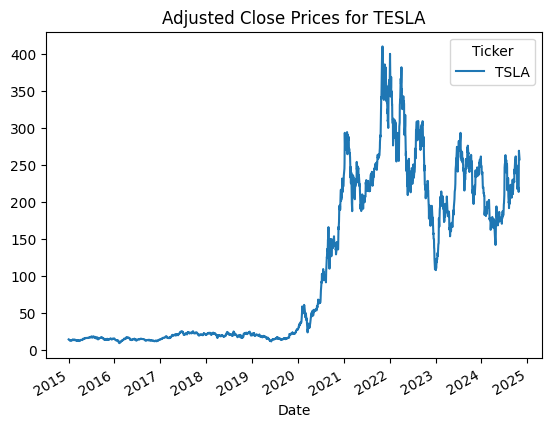

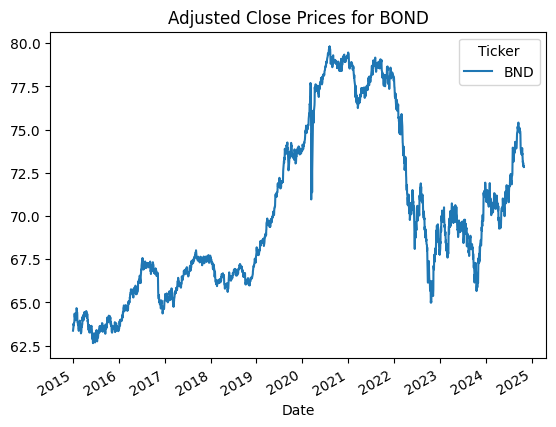

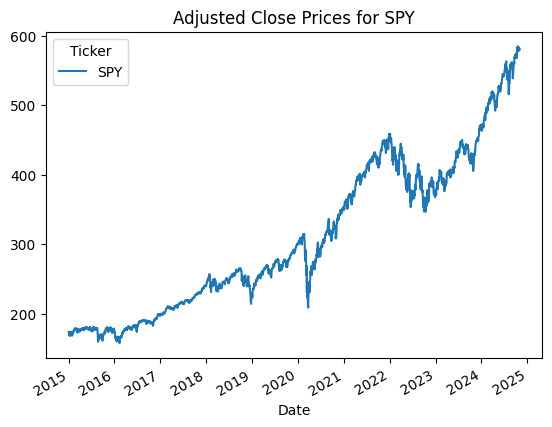

In [6]:
for asset, data in all_data.items():
    data['Adj Close'].plot(title=f"Adjusted Close Prices for {asset.upper()}")
    plt.show()

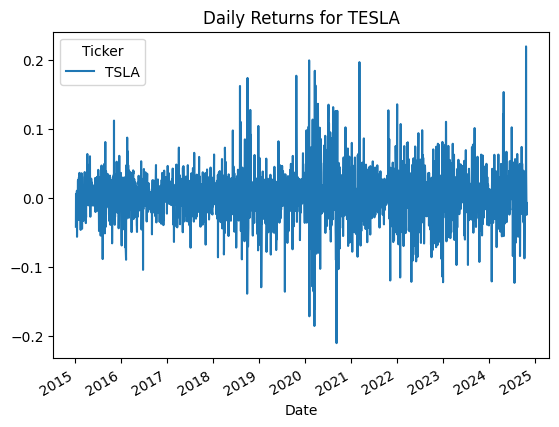

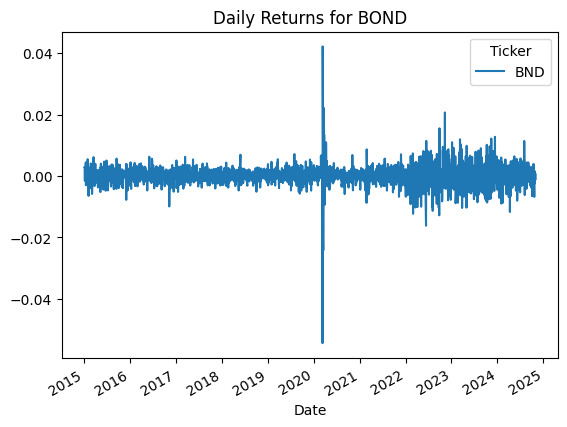

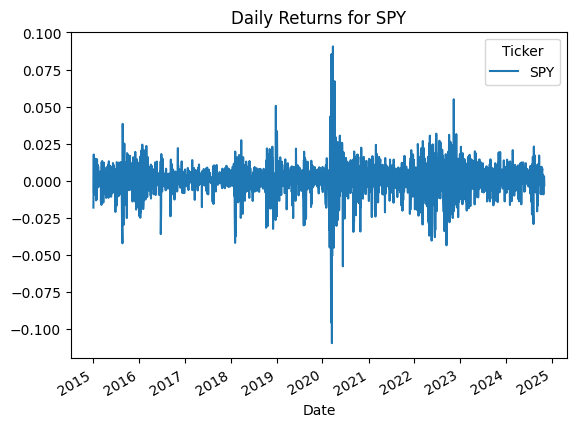

In [7]:
# Plot Daily Returns for all assets
for asset, data in all_data.items():
    returns = data['Adj Close'].pct_change().dropna()
    returns.plot(title=f"Daily Returns for {asset.upper()}")
    plt.show()

>> ## Volatility with shaded volatility range

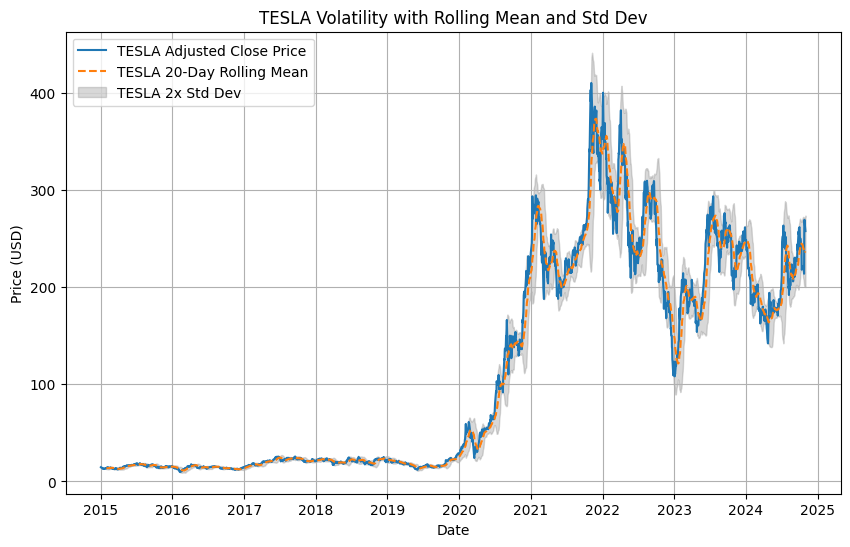

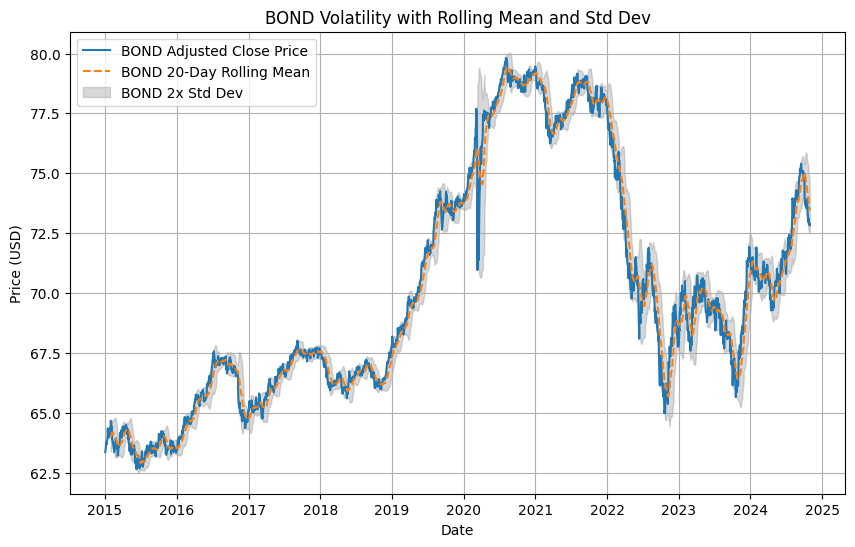

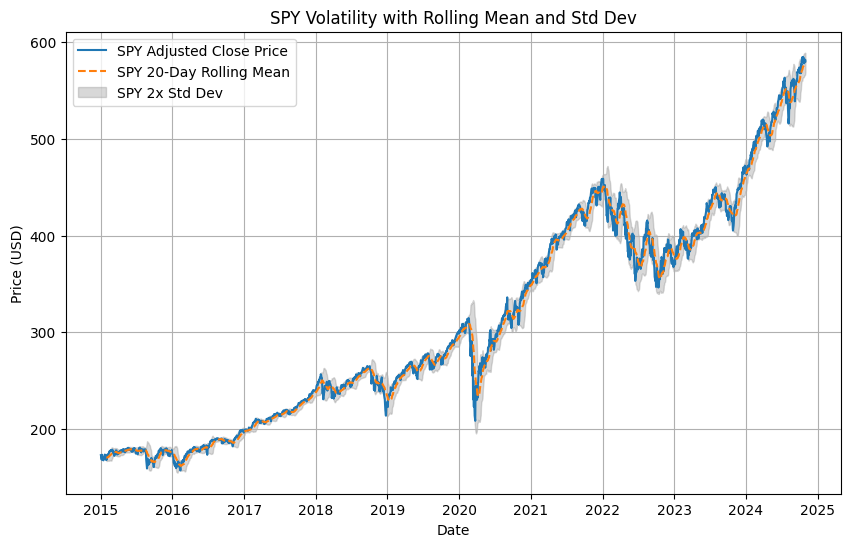

In [8]:
from scripts.visualizations import *
volatility(all_data)

>> ## Outliers

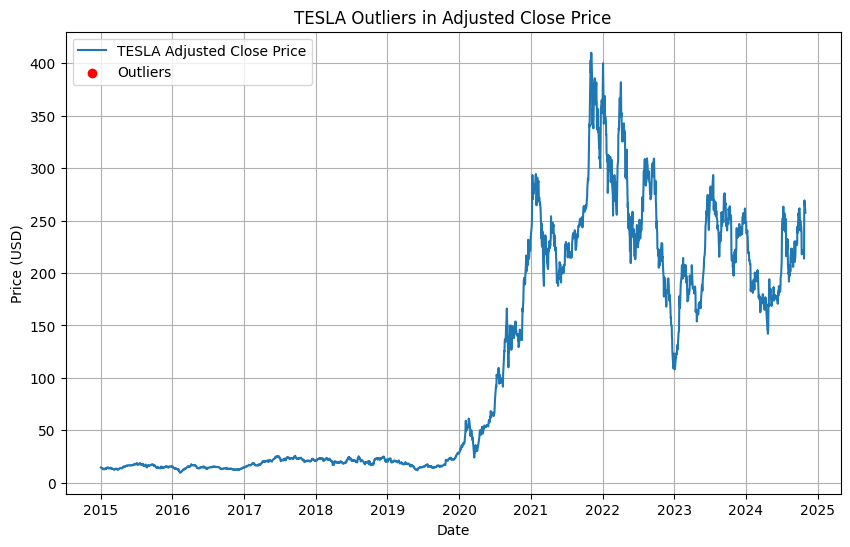

Outliers for TESLA:
Empty DataFrame
Columns: [(Adj Close, TSLA), (Z-Score, )]
Index: []




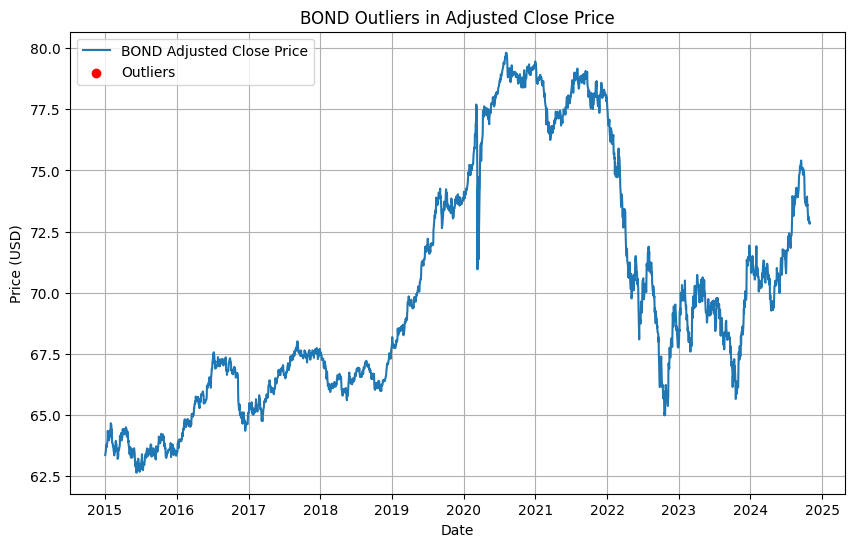

Outliers for BOND:
Empty DataFrame
Columns: [(Adj Close, BND), (Z-Score, )]
Index: []




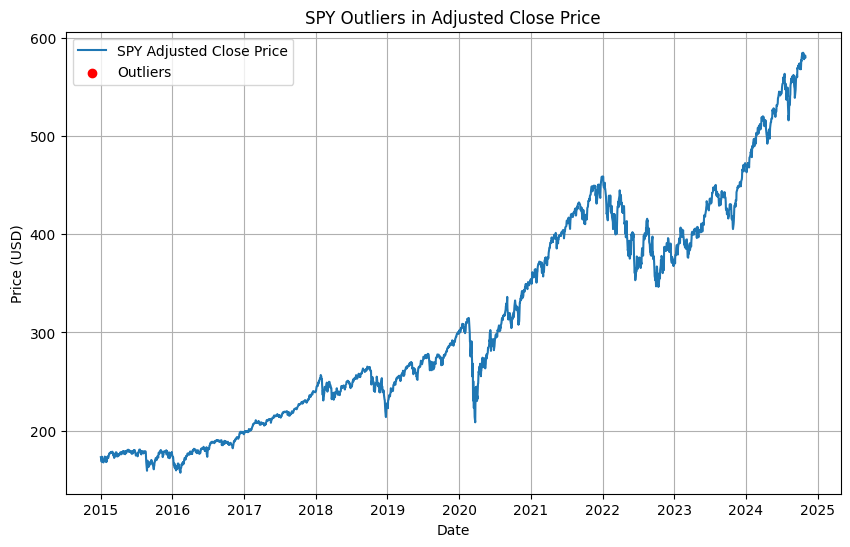

Outliers for SPY:
Empty DataFrame
Columns: [(Adj Close, SPY), (Z-Score, )]
Index: []




In [9]:
detect_outliers(all_data)   

>> ## Unusual High and Low Returns

>>> ### Calculate Daily returns

In [10]:
from scripts.features import *
calc_daily_return(all_data)

>>> ### Daily Percentage Change

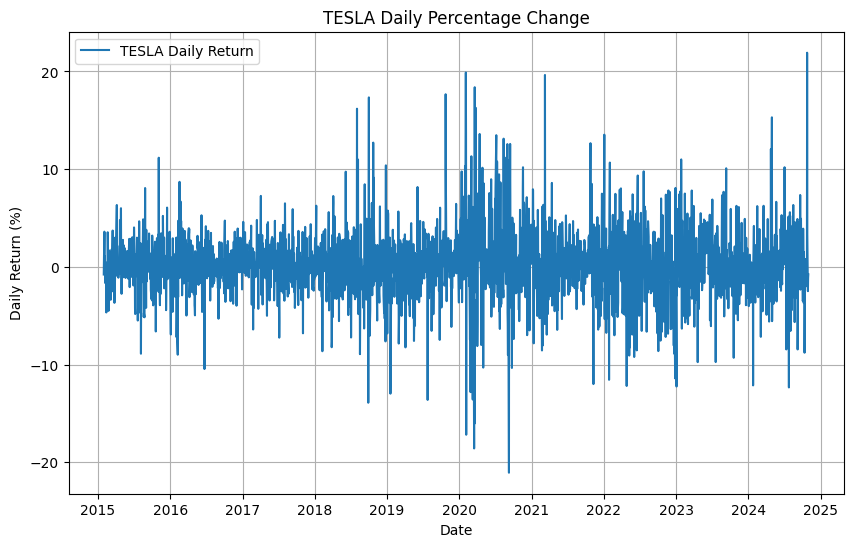

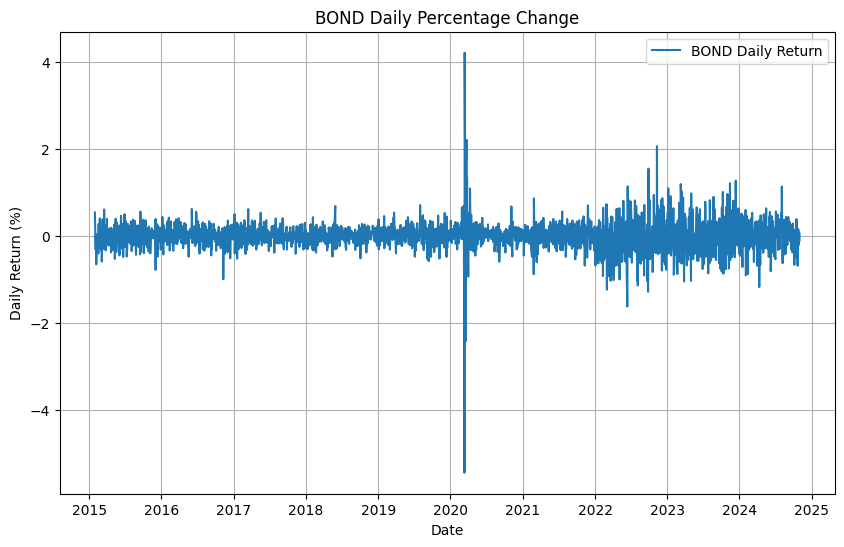

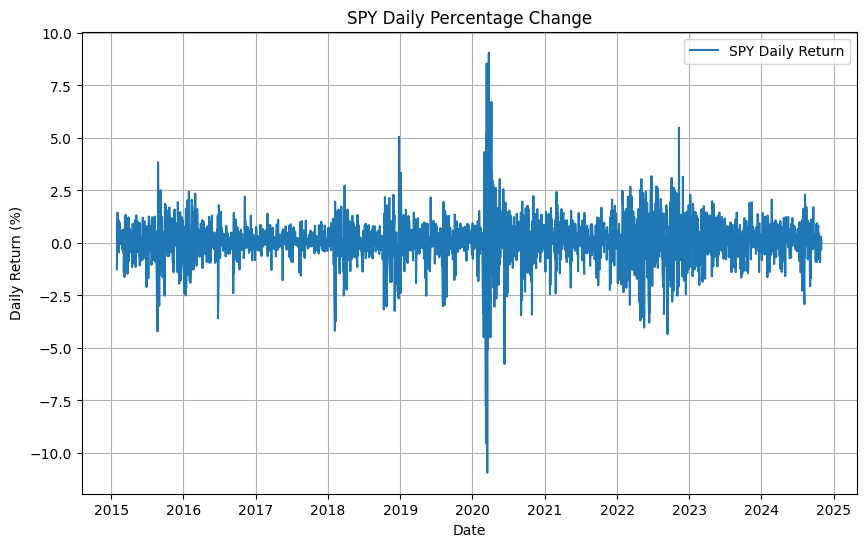

In [11]:
plot_daily_percentage(all_data)

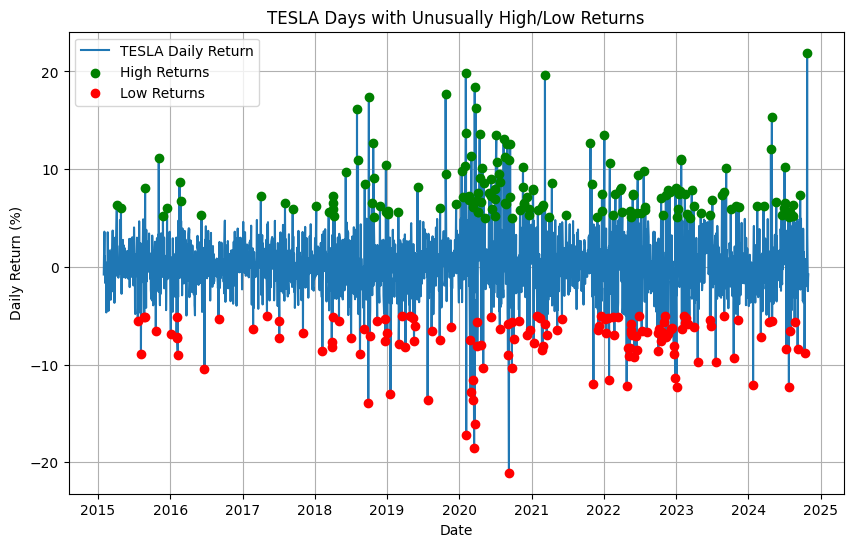

High Returns for TESLA:
Price                     Daily Return
Ticker                                
Date                                  
2015-04-06 00:00:00+00:00     6.335084
2015-04-27 00:00:00+00:00     6.006504
2015-08-27 00:00:00+00:00     8.072407
2015-11-04 00:00:00+00:00    11.173506
2015-11-25 00:00:00+00:00     5.218781
...                                ...
2024-07-29 00:00:00+00:00     5.595998
2024-08-13 00:00:00+00:00     5.235706
2024-08-15 00:00:00+00:00     6.336277
2024-09-19 00:00:00+00:00     7.359156
2024-10-24 00:00:00+00:00    21.919035

[159 rows x 1 columns]


Low Returns for TESLA:
Price                     Daily Return
Ticker                                
Date                                  
2015-07-21 00:00:00+00:00    -5.487851
2015-08-06 00:00:00+00:00    -8.884613
2015-08-20 00:00:00+00:00    -5.120475
2015-08-24 00:00:00+00:00    -5.156654
2015-10-20 00:00:00+00:00    -6.606755
...                                ...
2024-07-24 00:00:00+00:00   -1

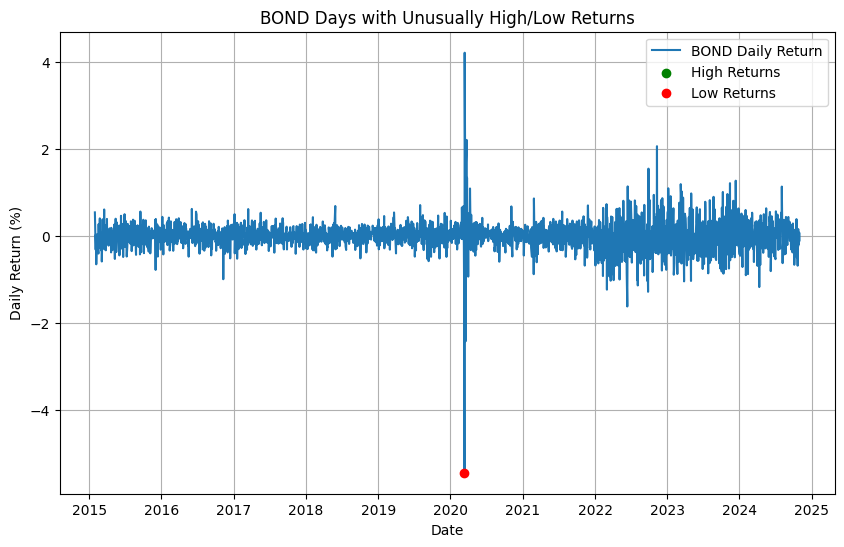

High Returns for BOND:
Empty DataFrame
Columns: [(Daily Return, )]
Index: []


Low Returns for BOND:
Price                     Daily Return
Ticker                                
Date                                  
2020-03-12 00:00:00+00:00    -5.438547




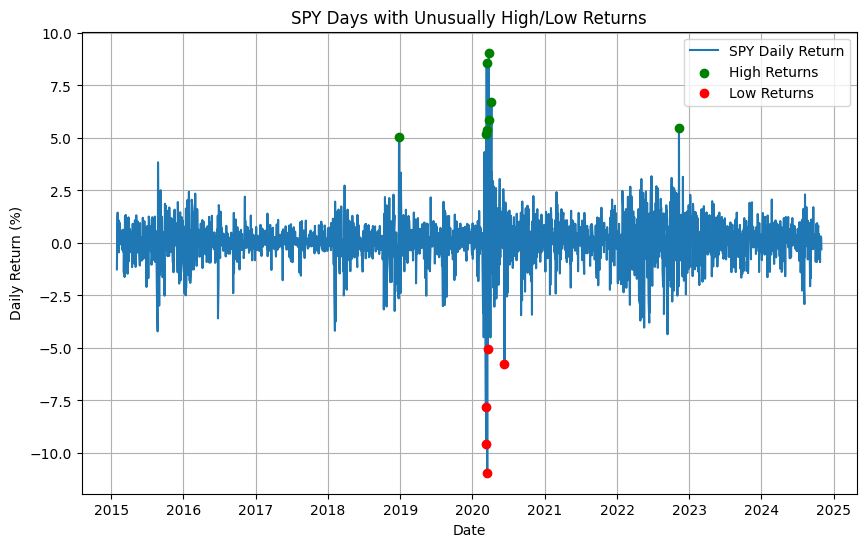

High Returns for SPY:
Price                     Daily Return
Ticker                                
Date                                  
2018-12-26 00:00:00+00:00     5.052490
2020-03-10 00:00:00+00:00     5.174484
2020-03-13 00:00:00+00:00     8.548617
2020-03-17 00:00:00+00:00     5.399190
2020-03-24 00:00:00+00:00     9.060345
2020-03-26 00:00:00+00:00     5.838968
2020-04-06 00:00:00+00:00     6.716632
2022-11-10 00:00:00+00:00     5.495404


Low Returns for SPY:
Price                     Daily Return
Ticker                                
Date                                  
2020-03-09 00:00:00+00:00    -7.809422
2020-03-12 00:00:00+00:00    -9.567712
2020-03-16 00:00:00+00:00   -10.942359
2020-03-18 00:00:00+00:00    -5.063273
2020-06-11 00:00:00+00:00    -5.764899




In [12]:
plot_significant_anomalies(all_data)

>> ## Seasonality and Trends

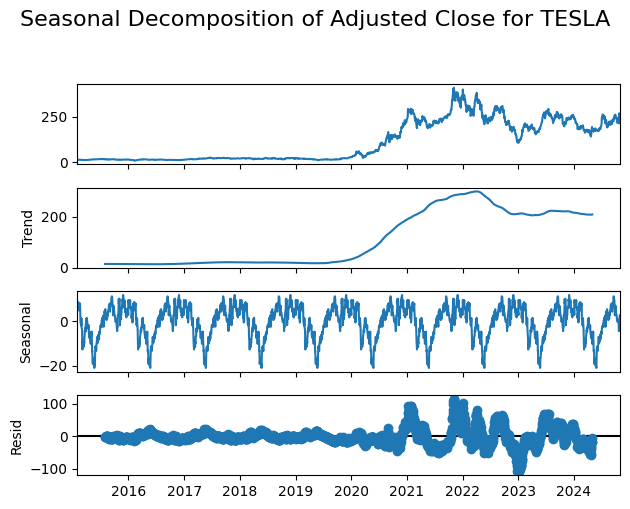

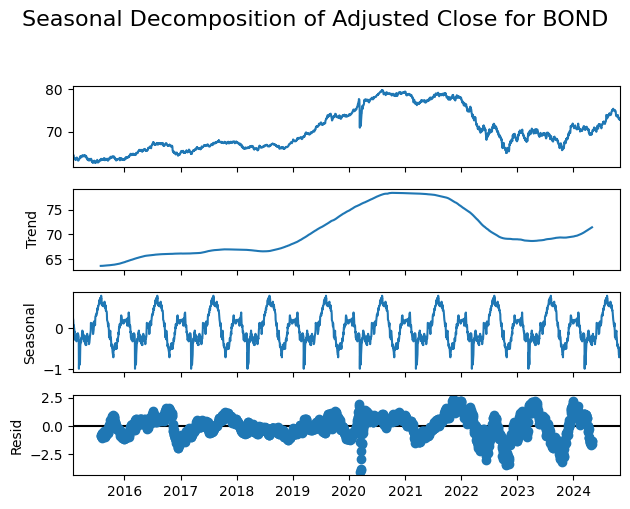

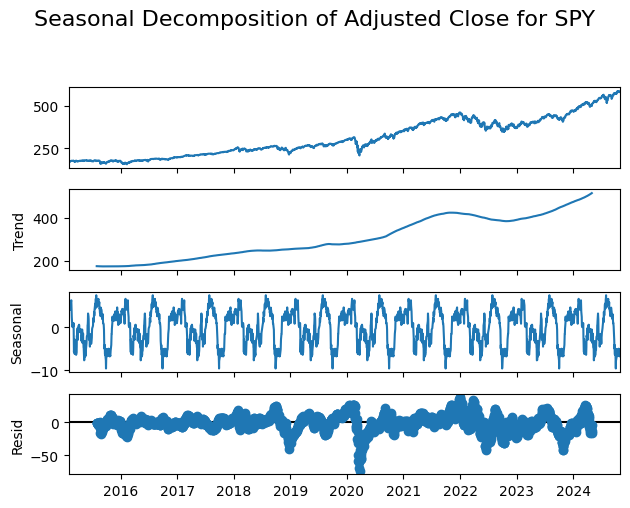

In [13]:
decomposition(all_data)

>> ## Volatility with separate lines for Adjusted Close, Rolling Mean, and Rolling Std Dev

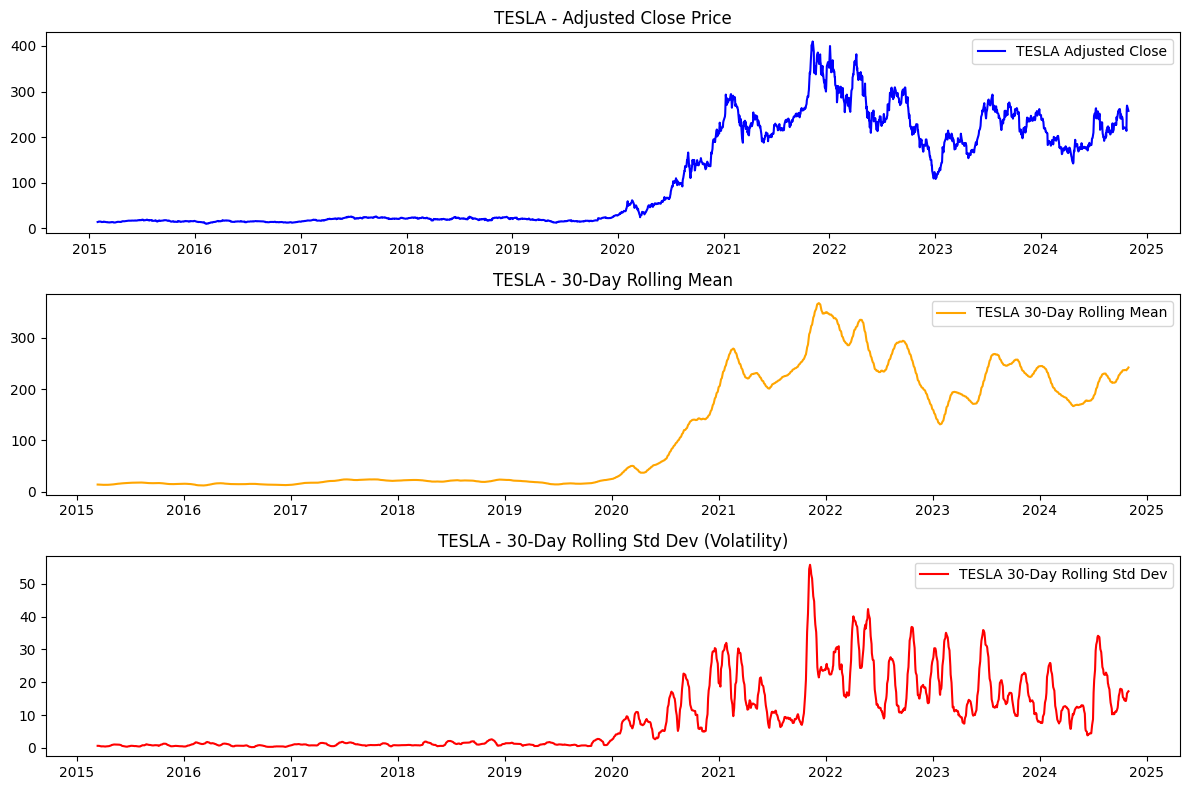

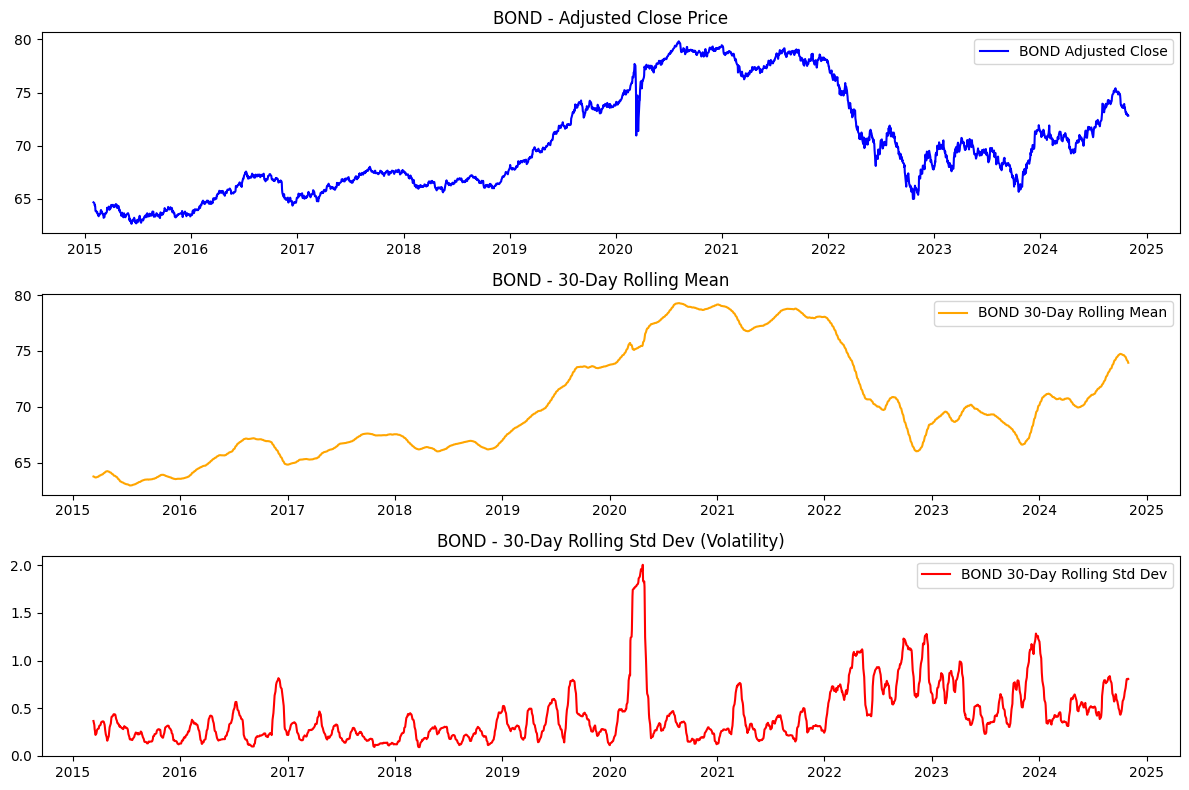

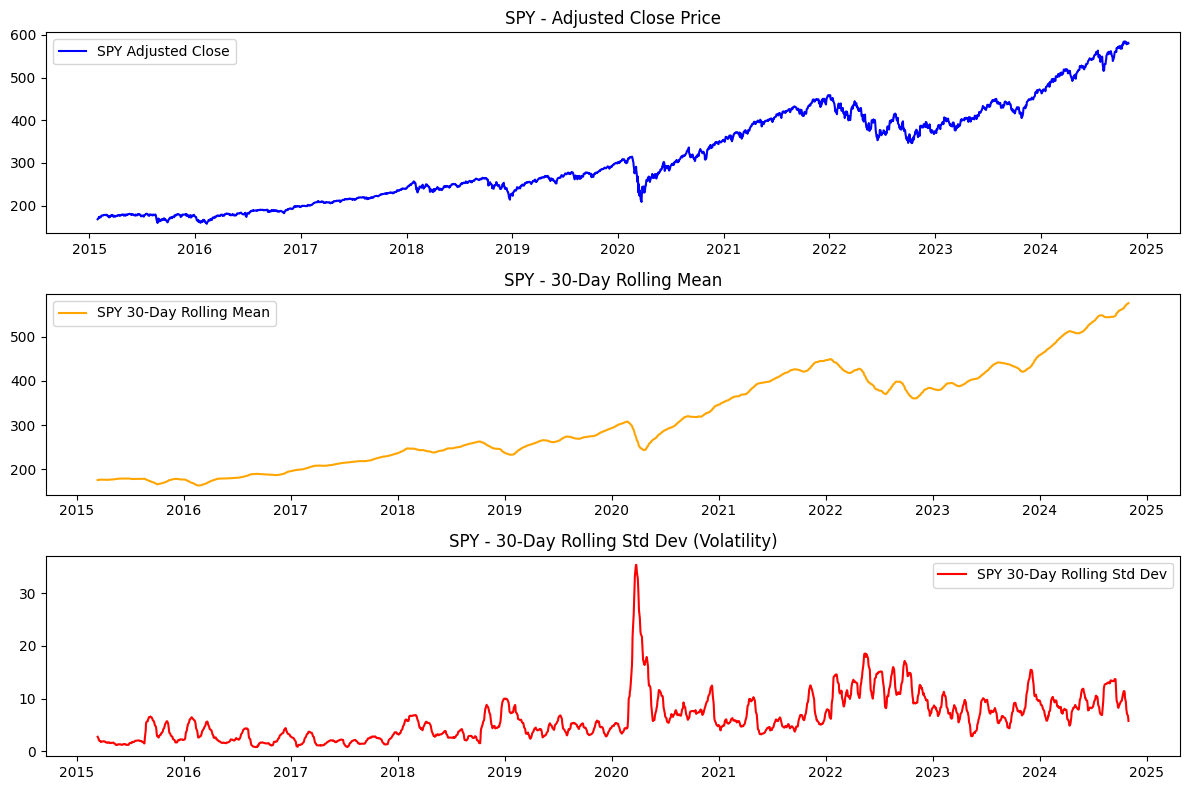

In [14]:
# Define the window size for rolling calculations
window_size = 30  # 30 days

volatility_rolling(window_size,all_data)


>> ## Value At Risk

In [15]:
VaR_values = {}
for asset, data in all_data.items():
    VaR_value = VAR(asset, data)
    if VaR_value is not None: 
        VaR_values[asset] = VaR_value

tesla - 5% Value at Risk (95% confidence): -5.1251
bond - 5% Value at Risk (95% confidence): -0.4801
spy - 5% Value at Risk (95% confidence): -1.6762


In [16]:
print(VaR_values['tesla'])

-5.125142382150489


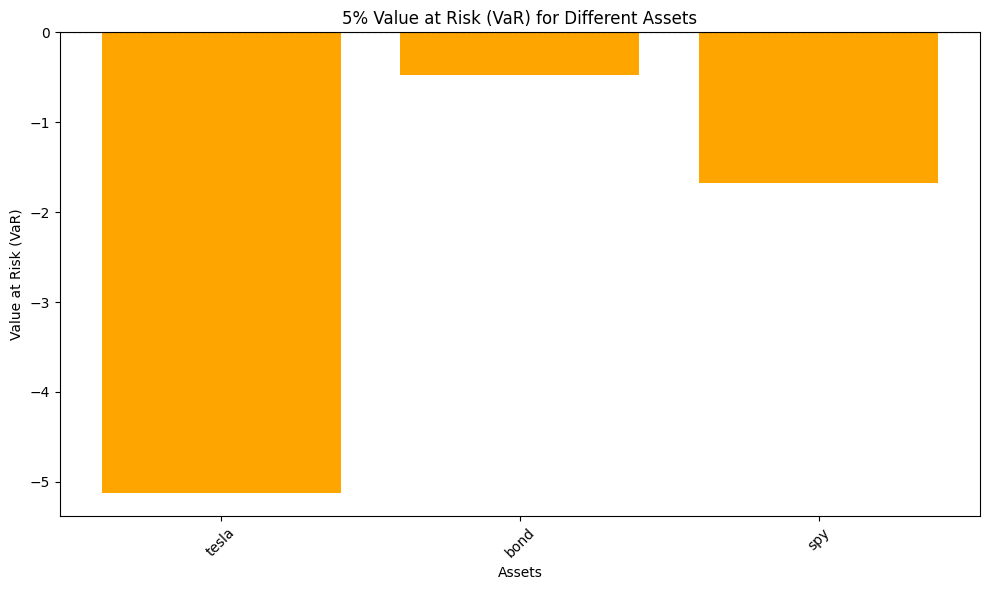

In [17]:
VAR_plot(VaR_values)

>> ## Sharpe Ratio

In [18]:
sharpe_values = {}
for asset, data in all_data.items():
    sharpe_value = Sharpe(asset, data)
    sharpe_values[asset] = sharpe_value

tesla Sharpe Ratio: 0.0512
bond Sharpe Ratio: 0.0162
spy Sharpe Ratio: 0.0504


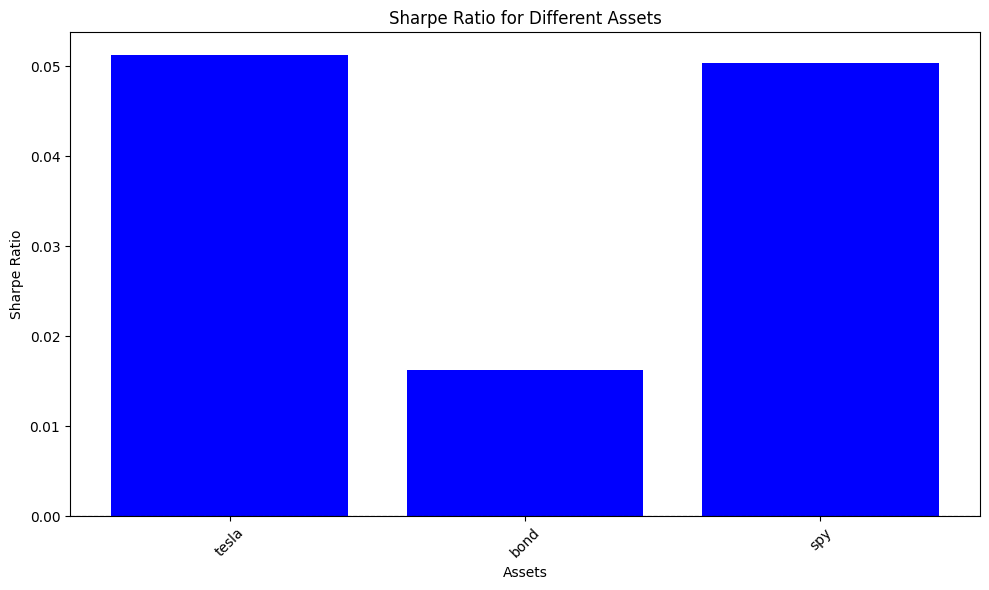

In [19]:
sharpe_plot(sharpe_values)